In [1]:
%matplotlib notebook

### Load synthetic dynamic network

In [2]:
from dynetlsm.datasets import simple_splitting_dynamic_network

Y, labels = simple_splitting_dynamic_network(n_nodes=50, n_time_steps=2)

### Initialize the LSM model and run the Gibbs sampler

In [3]:
from dynetlsm import DynamicNetworkLSM

lsm = DynamicNetworkLSM(n_iter=5000, burn=2500, tune=2500,
                        n_features=2, random_state=42).fit(Y)

100%|██████████| 9999/9999 [01:15<00:00, 132.42it/s]


### Plot traces to assess model convergence

<IPython.core.display.Javascript object>


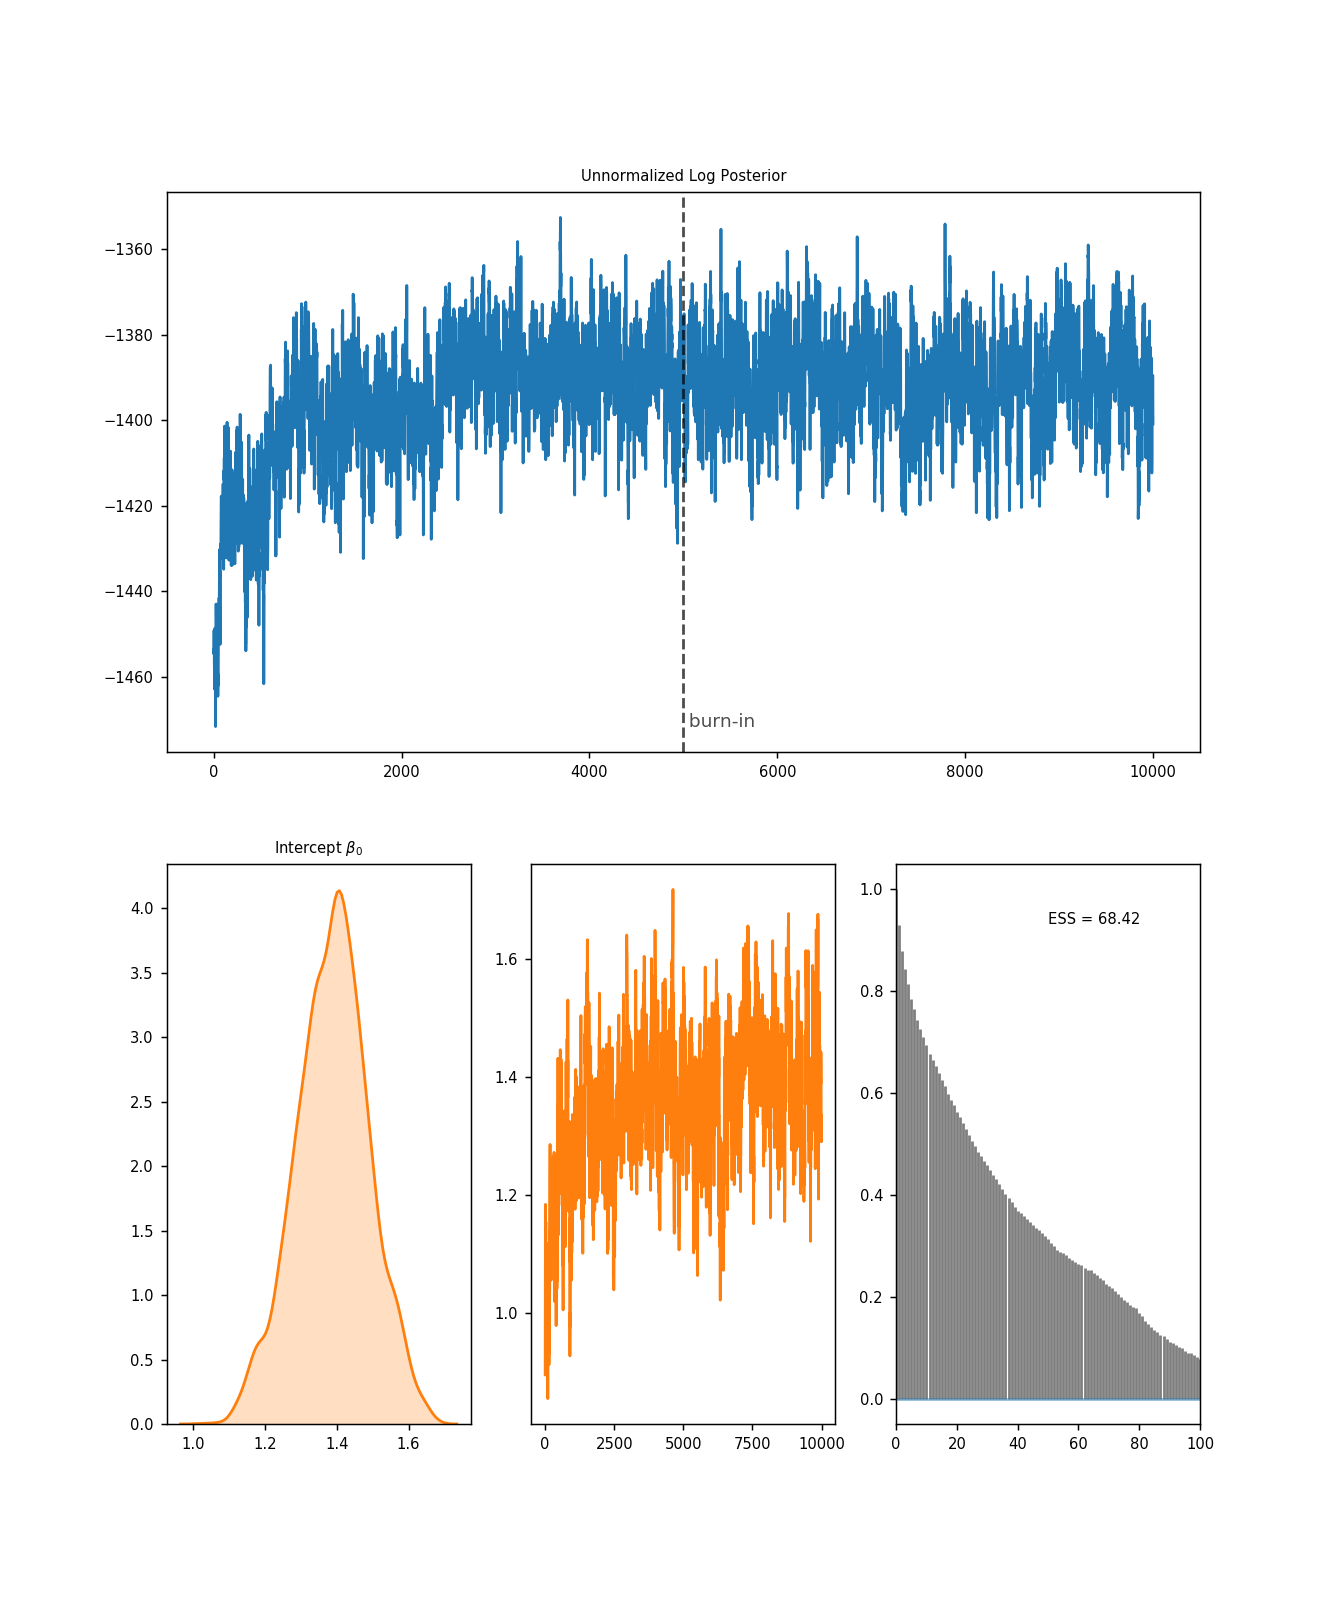

In [4]:
from dynetlsm.plots import plot_traces

plot_traces(lsm)

### Visualize the infered latent space

<IPython.core.display.Javascript object>


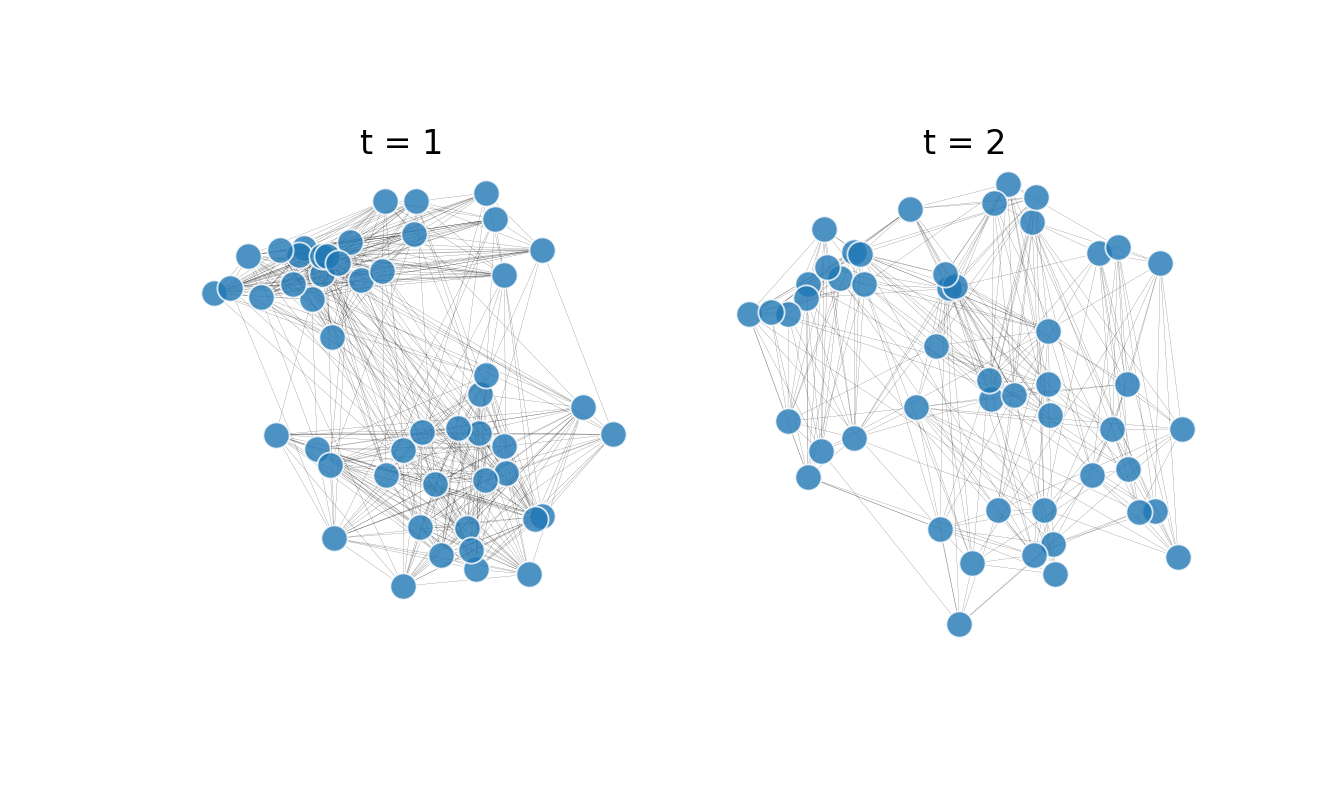

In [5]:
from dynetlsm.plots import plot_latent_space

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
for t, ax in enumerate(axes.flat):
    plot_latent_space(lsm, t=t, connectionstyle=None, number_nodes=False, 
                      linewidth=0.1, node_size=200, border=0.2, ax=ax)

### Initialize the HDP-LPCM and run the Gibbs sampler

In [6]:
from dynetlsm import DynamicNetworkHDPLPCM

lpcm = DynamicNetworkHDPLPCM(random_state=42).fit(Y)

100%|██████████| 9999/9999 [04:14<00:00, 39.26it/s]


<IPython.core.display.Javascript object>


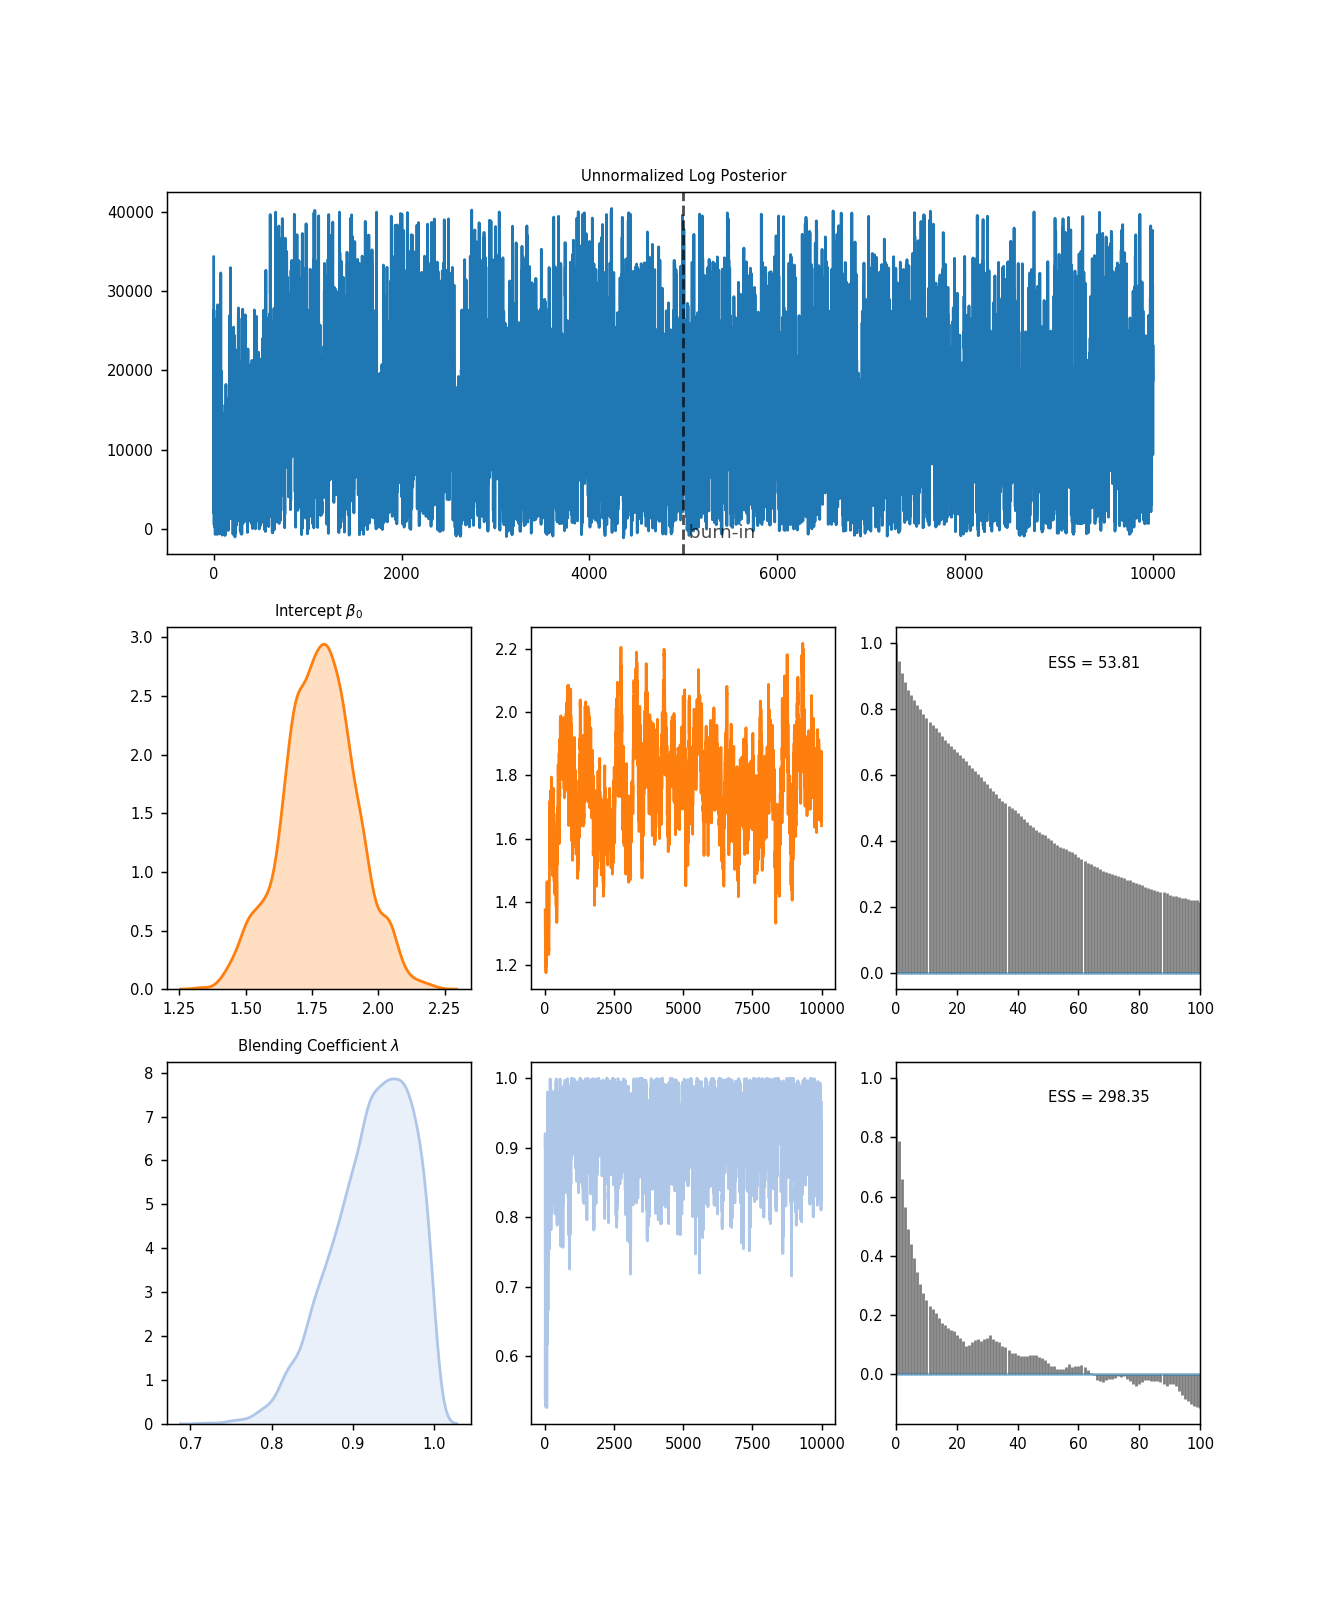

(<Figure size 1000x1200 with 7 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b4f39d0>,
         None, None],
       dtype=object))

In [7]:
from dynetlsm.plots import plot_traces

plot_traces(lpcm)

### Visualize the inferred latent space

<IPython.core.display.Javascript object>


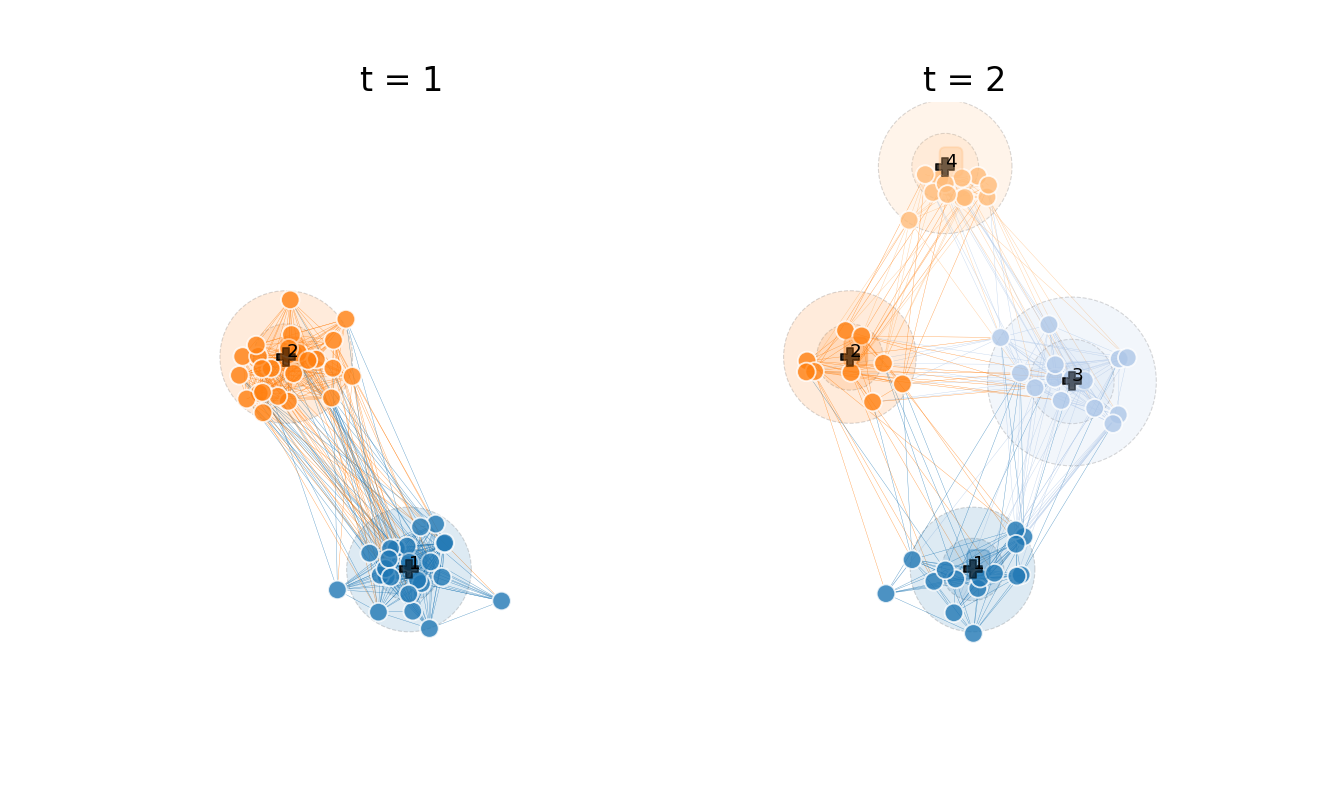

In [8]:
from dynetlsm.plots import plot_latent_space

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
for t, ax in enumerate(axes.flat):
    plot_latent_space(lpcm, t=t, connectionstyle=None, 
                      number_nodes=False, border=1.2, linewidth=0.2, 
                      center_size=100,
                      node_size=100, ax=ax)

### Visualize the community dynamics with an Alluvial diagram

<IPython.core.display.Javascript object>


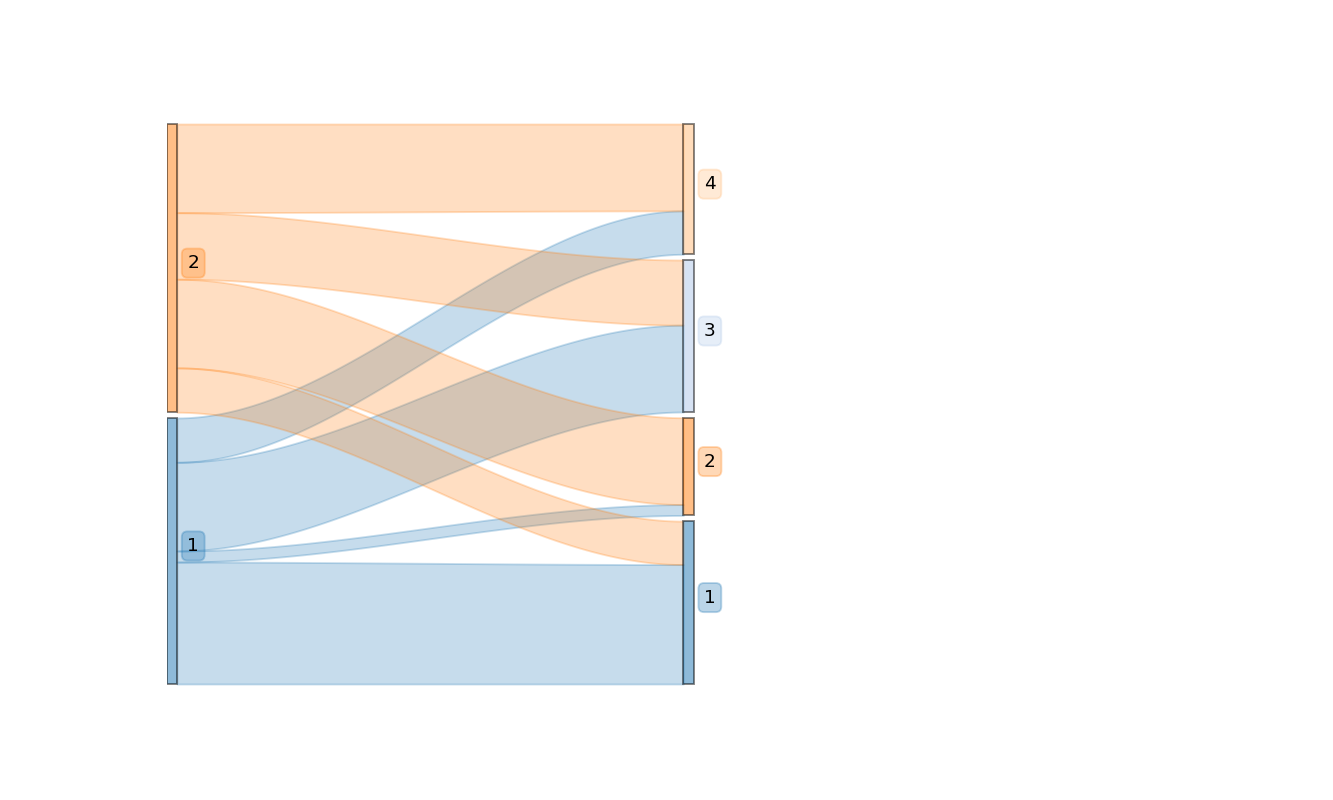

(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x133a8f590>)

In [9]:
from dynetlsm.plots import alluvial_plot

alluvial_plot(lpcm.z_)